<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Loading" data-toc-modified-id="Data-Loading-1">Data Loading</a></span></li><li><span><a
href="#Table1:-Geographical-characteristics-of-the-PRISM-information" data-toc-modified-id="Table1:-2">Table1: Geographical characteristics of the PRISM information</a></span></li><li><span><a href="#Figure3:Temporal-average-precipitation" data-toc-modified-id="Figure3:-3">Figure3: Temporal average precipitation</a></span></li><li><span><a href="#Quantization-methods" data-toc-modified-id="Quantization-methods-4">Quantization methods</a></span></li><li><span><a href="#Network-Design:-network-ranking-results" data-toc-modified-id="Network-Design:-network-ranking-results-5">Network Design: network ranking results</a></span></li><li><span><a href="#Joint-entropy-evolution-for-different-quantization-method" data-toc-modified-id="Joint-entropy-evolution-for-different-quantization-method-6">Joint entropy evolution for different quantization method </a></span></li><li><span><a href="#Summary-of-Results" data-toc-modified-id="Summary-of-Results-7">Summary of Results </a></span><ul class="toc-item"><li><span><a href="#Table2:-Information-statistics-of-stations-resulted-from-different-binning-estimation" data-toc-modified-id="Table2-3.1">Table2: Information statistics of stations resulted from different binning estimation</a></span></li><li><span><a href="#Figure4:-The-resulting-joint-entropy-and-their-saturation-points" data-toc-modified-id="#Figure4:-The-resulting-joint-entropy-and-their-saturation-points-3.2">Figure4: The resulting joint entropy and their saturation points</a></span></li><li><span><a href="#Figure7:-The-resulting-AUI-and-joint-entropy-for-all-possible-combinations-between-set-of-selected-sensors-and-potential-candidates" data-toc-modified-id="Figure7-3.3">Figure7: The resulting AUI and joint entropy for all possible combinations between set of selected sensors and potential candidates</a></span></li><li><span><a href="#Table3:-Optimal-gauge-orders-found-with-different-methods-and-corresponding-marginal-and-joint-entropies" data-toc-modified-id="Table3-3.4">Table3: Optimal gauge orders found with different methods and corresponding marginal and joint entropies</a></span></li><li><span><a href="#Generate-input-(.csv-to-produce-figure6-in-R-language)" data-toc-modified-id="Generate-input-(.csv-to-produce-figure6-in-R-language)-3.5">Generate input (".csv" to produce figure6 in R language)</a></span></li><li><span><a href="#Generate-input-(.csv-to-produce-figure8-in-R-language)" data-toc-modified-id="Generate-input-(.csv-to-produce-figure8-in-R-language)-3.6">Generate input (".csv" to produce figure8 in R language)</a></span></li></ul></li></ul></div>

# Data Loading

In [1]:
import pandas as pd
import numpy as np
import time
import seaborn as sns
from glob import glob
import scipy.stats
import matplotlib.pyplot as plt
import math
from matplotlib import ticker as mticker
originaldata_geo_info=pd.read_csv('rawdata_geographical_information.csv')
originaldata=pd.read_csv('rawdata_time_series.csv')
originaldata

,grid_ID1,grid_ID2,grid_ID3,grid_ID4,grid_ID5,grid_ID6,grid_ID7,grid_ID8,grid_ID9,grid_ID10,...,grid_ID23,grid_ID24,grid_ID25,grid_ID26,grid_ID27,grid_ID28,grid_ID29,grid_ID30,grid_ID31,grid_ID32
0,273.066010,267.276001,239.987000,214.682999,194.912003,181.311996,265.140015,261.570007,249.981003,222.001007,...,230.975006,211.966995,190.807999,175.345001,156.654999,232.615005,227.938004,210.210999,188.761002,174.272995
1,615.869019,584.000977,488.260010,435.488007,375.421997,333.511993,597.317017,575.666016,535.335999,461.709991,...,504.580994,444.083008,382.640991,334.196014,282.226013,540.479004,507.217010,445.975006,381.065002,331.848999
2,489.808990,476.078003,411.170013,385.554993,355.160004,333.084015,483.479004,472.704987,437.744995,391.029999,...,426.141998,383.136993,353.203003,325.834991,299.946991,464.592987,427.897003,385.936005,350.546997,325.834991
3,548.468994,524.565002,426.855988,331.601013,294.631012,259.519989,520.198975,518.145020,473.532990,367.868988,...,437.988007,353.218994,284.127014,254.162994,204.091995,477.144989,435.975006,358.455994,285.450989,255.671997
4,203.104004,196.621994,178.401993,155.397995,129.580002,104.142998,195.906998,198.539993,185.643005,169.865005,...,177.677002,155.369003,132.184006,105.231003,80.593002,186.470993,178.033005,155.528000,133.014008,104.891998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,164.912003,166.242996,164.858994,159.561996,149.153000,130.783997,164.785995,167.205994,168.406006,163.677994,...,165.470001,152.826004,130.973999,100.579002,77.550003,163.259995,165.600006,149.992004,127.174004,100.749001
692,373.532990,370.031006,357.186005,330.769012,291.390991,266.515991,387.473999,391.566986,387.614014,357.042999,...,388.459991,335.707001,285.528015,266.618988,226.975998,390.859985,387.122009,335.295990,284.221008,256.684998
693,444.748993,412.221008,400.776001,384.799988,360.972992,342.792999,478.938995,475.109009,431.681000,408.386993,...,437.889008,396.220001,378.390015,347.423004,302.540009,476.253998,434.644989,396.848999,366.541992,331.316010
694,467.503998,453.808990,443.770996,427.600006,410.091003,386.572998,490.292999,488.294006,468.417999,449.729004,...,475.890991,428.450989,406.984009,355.725006,290.428986,515.773010,475.867004,429.950012,392.697998,339.354004


# Table1: Geographical characteristics of the PRISM information

In [2]:
Table1= originaldata_geo_info
Table1.insert(Table1.shape[1],"Max precipit.", originaldata.max().values, True) 
Table1.insert(Table1.shape[1],"Min precipit.", originaldata.min().values, True) 
Table1.insert(Table1.shape[1],"Mean precipit.", originaldata.mean().values, True) 
Table1.insert(Table1.shape[1],"SD precipit.", originaldata.std().values, True) 
display('======================================Table1: Geographical characteristics of the PRISM information ==================================')
display(Table1)

'======================================Table1: Geographical characteristics of the PRISM information =================================='

,Grid IDs,Elevation(m),Lon.(°),Lat.(°),Max precipit.,Min precipit.,Mean precipit.,SD precipit.
0,1,1413,-123.192,49.483,1144.776001,1.286,301.203934,202.095046
1,2,1423,-123.200,49.483,1100.076050,1.233,295.199382,196.307546
2,3,1286,-123.208,49.483,993.242981,1.228,271.482889,176.265038
3,4,988,-123.217,49.483,854.346008,1.246,248.843064,161.117596
4,5,692,-123.225,49.483,786.692993,1.167,226.495876,147.657563
5,6,404,-123.233,49.483,732.778992,1.169,205.804336,137.804882
6,7,1234,-123.183,49.475,1115.578979,1.287,296.745754,196.433619
7,8,1412,-123.192,49.475,1089.336060,1.287,296.876079,195.855214
8,9,1617,-123.200,49.475,1015.705994,1.215,286.100635,186.744266
9,10,974,-123.208,49.475,929.950989,1.161,261.688770,169.132356


# Figure3:Temporal average precipitation

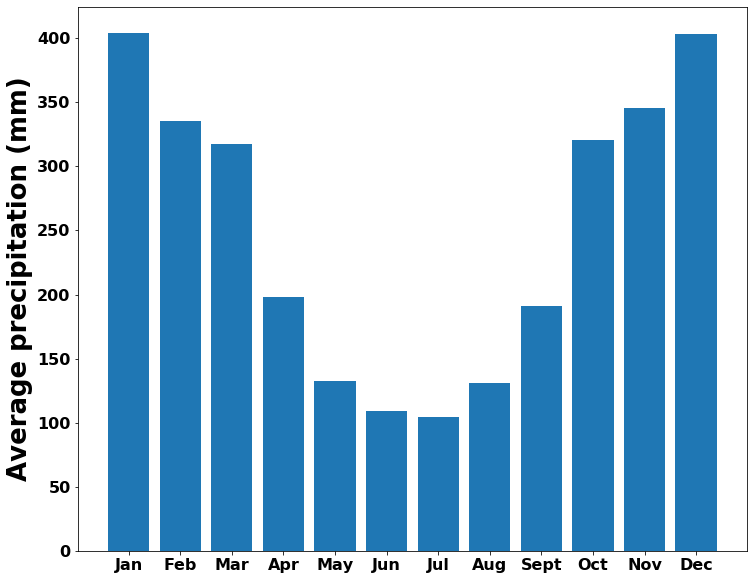

In [3]:
Jan=originaldata.iloc[0::12].mean().mean()
Feb=originaldata.iloc[1::12].mean().mean()
Mar=originaldata.iloc[2::12].mean().mean()
Apr=originaldata.iloc[3::12].mean().mean()
May=originaldata.iloc[4::12].mean().mean()
Jun=originaldata.iloc[5::12].mean().mean()
Jul=originaldata.iloc[6::12].mean().mean()
Aug=originaldata.iloc[7::12].mean().mean()
Sep=originaldata.iloc[8::12].mean().mean()
Oct=originaldata.iloc[9::12].mean().mean()
Nov=originaldata.iloc[10::12].mean().mean()
Dec=originaldata.iloc[11::12].mean().mean()
average_precipitation=[Jan, Feb,Mar, Apr, May, Jun, Jul, Aug, Sep,Oct, Nov, Dec]


fig=plt.figure(figsize=(12, 10))
plt.bar(np.arange(12), average_precipitation)
plt.xticks(np.arange(12), ('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec'))
plt.ylabel('Average precipitation (mm)', fontsize=26, fontweight='bold')
plt.xticks(fontsize=16,fontweight='bold')
plt.yticks(fontsize=16,fontweight='bold')
plt.show()
fig.savefig("Temporal average precipitation.png",dpi=1200, bbox_inches="tight", pad_inches=.5,transparent=True)

# Quantization methods

In [4]:
# Data quantization
from maxJEUI_function_list import floor_quantization
from maxJEUI_function_list import Scott_quantization
from maxJEUI_function_list import Sturges_quantization

Sturges_quantized=Sturges_quantization(originaldata)[0]
Scott_quantized=Scott_quantization(originaldata)[0]
a_f_110=110 # 110(m^3/s) for  a_f parameter defined in the paper
a_f_68=68 # 68(m^3/s) for  a_f parameter defined in the paper
floor_quantized_a_f_110=floor_quantization(originaldata,a_f_110)[0]
floor_quantized_a_f_68=floor_quantization(originaldata,a_f_68)[0]

# Network Design: network ranking results

In [5]:
# network ranking  
from maxJEUI_function_list import greedy_optimizer_maxJE
from maxJEUI_function_list import greedy_optimizer_maxJEUI
from maxJEUI_function_list import hms_string
start_time = time.time()
maxJE_optimal_order_floor_a_f_110=greedy_optimizer_maxJE(floor_quantized_a_f_110)
maxJE_optimal_order_floor_a_f_68=greedy_optimizer_maxJE(floor_quantized_a_f_68)
maxJE_optimal_order_Sturges=greedy_optimizer_maxJE(Sturges_quantized)
maxJE_optimal_order_Scott=greedy_optimizer_maxJE(Scott_quantized)
maxJEUI_optimal_order_floor_a_f_110=greedy_optimizer_maxJEUI(floor_quantized_a_f_110)

time_took = time.time() - start_time
print(f"# Run Time={hms_string(time_took)}")

# Run Time=0:31:21.37



# Joint entropy evolution for different quantization method 

In [6]:
from maxJEUI_function_list import info_stats_merging_operator_multiple_varibles

Joint_entropy_evolution_maxJE_Ranking=pd.DataFrame(np.zeros(4*32, dtype='f').reshape(4,32),index=['Scott','Sturges','floor_68','floor_110'],
                    columns=['grid_ID'+str(i) for i in (np.arange(32)+1)])

for i in np.arange(32):
    Joint_entropy_evolution_maxJE_Ranking.iloc[0,i]=info_stats_merging_operator_multiple_varibles(Scott_quantized,maxJE_optimal_order_Scott[0:i+1])[0]
    Joint_entropy_evolution_maxJE_Ranking.iloc[1,i]=info_stats_merging_operator_multiple_varibles(Sturges_quantized,maxJE_optimal_order_Sturges[0:i+1])[0]
    Joint_entropy_evolution_maxJE_Ranking.iloc[2,i]=info_stats_merging_operator_multiple_varibles(floor_quantized_a_f_68,maxJE_optimal_order_floor_a_f_68[0:i+1])[0]
    Joint_entropy_evolution_maxJE_Ranking.iloc[3,i]=info_stats_merging_operator_multiple_varibles(floor_quantized_a_f_110,maxJE_optimal_order_floor_a_f_110[0:i+1])[0]


Joint_entropy_evolution_maxJE_Ranking

,grid_ID1,grid_ID2,grid_ID3,grid_ID4,grid_ID5,grid_ID6,grid_ID7,grid_ID8,grid_ID9,grid_ID10,...,grid_ID23,grid_ID24,grid_ID25,grid_ID26,grid_ID27,grid_ID28,grid_ID29,grid_ID30,grid_ID31,grid_ID32
Scott,3.429189,4.880610,5.581837,6.076684,6.481025,6.820052,7.093490,7.333223,7.487562,7.612283,...,8.352390,8.366471,8.379050,8.387671,8.396292,8.403123,8.405997,8.408871,8.411744,8.411744
Sturges,2.747430,3.808842,4.430296,4.911608,5.239377,5.512879,5.754881,5.931013,6.094253,6.235655,...,7.203368,7.227060,7.247759,7.266262,7.277756,7.289250,7.300601,7.308137,7.308137,7.308137
floor_68,3.449145,4.896429,5.664530,6.194191,6.643578,6.928061,7.182218,7.376763,7.540856,7.681657,...,8.426064,8.441516,8.455323,8.468987,8.479776,8.488397,8.495229,8.500976,8.504934,8.507808
floor_110,2.803447,3.934833,4.655723,5.166349,5.553077,5.798270,6.032157,6.226887,6.402520,6.537669,...,7.436922,7.464012,7.489049,7.511858,7.530744,7.546197,7.559860,7.568481,7.577102,7.582849


# Summary of Results 

# Table2: Information statistics of stations resulted from different binning estimation

In [7]:
from maxJEUI_function_list import entropy_1D
from maxJEUI_function_list import info_stats_merging_operator_multiple_varibles

Table2=pd.DataFrame(np.zeros(4*4, dtype='f').reshape(4,4),index=['Scott','Sturges','floor_68','floor_110'],
                    columns=['Min marginal entropy','Average marginal entropy','max marginal entropy','Joint entropy'])
marginal_entropy=pd.DataFrame(np.zeros(4*32, dtype='f').reshape(4,32),index=['Scott','Sturges','floor_68','floor_110'],
                              columns=['grid_ID'+str(i) for i in (np.arange(32)+1)])
Joint_entropy_network=np.zeros(4)
Joint_entropy_network[0]=info_stats_merging_operator_multiple_varibles(Scott_quantized,maxJE_optimal_order_Scott)[0]
Joint_entropy_network[1]=info_stats_merging_operator_multiple_varibles(Sturges_quantized,maxJE_optimal_order_Sturges)[0]
Joint_entropy_network[2]=info_stats_merging_operator_multiple_varibles(floor_quantized_a_f_68,maxJE_optimal_order_floor_a_f_68)[0]
Joint_entropy_network[3]=info_stats_merging_operator_multiple_varibles(floor_quantized_a_f_110,maxJE_optimal_order_floor_a_f_110)[0]

for i in  np.arange(32):
    marginal_entropy.iloc[0,i]=entropy_1D(Scott_quantized.iloc[:,i])
    marginal_entropy.iloc[1,i]=entropy_1D(Sturges_quantized.iloc[:,i])
    marginal_entropy.iloc[2,i]=entropy_1D(floor_quantized_a_f_68.iloc[:,i])
    marginal_entropy.iloc[3,i]=entropy_1D(floor_quantized_a_f_110.iloc[:,i])

Table2.iloc[:,0]=marginal_entropy.min(axis=1)
Table2.iloc[:,1]=marginal_entropy.mean(axis=1)
Table2.iloc[:,2]=marginal_entropy.max(axis=1)
Table2.iloc[:,3]=Joint_entropy_network
display(Table2)

,Min marginal entropy,Average marginal entropy,max marginal entropy,Joint entropy
Scott,2.592773,3.130177,3.429189,8.411744
Sturges,1.914789,2.447875,2.747430,7.308137
floor_68,2.647759,3.162835,3.449145,8.507808
floor_110,2.068419,2.531024,2.803447,7.582849


# Figure4: The resulting joint entropy and their saturation points

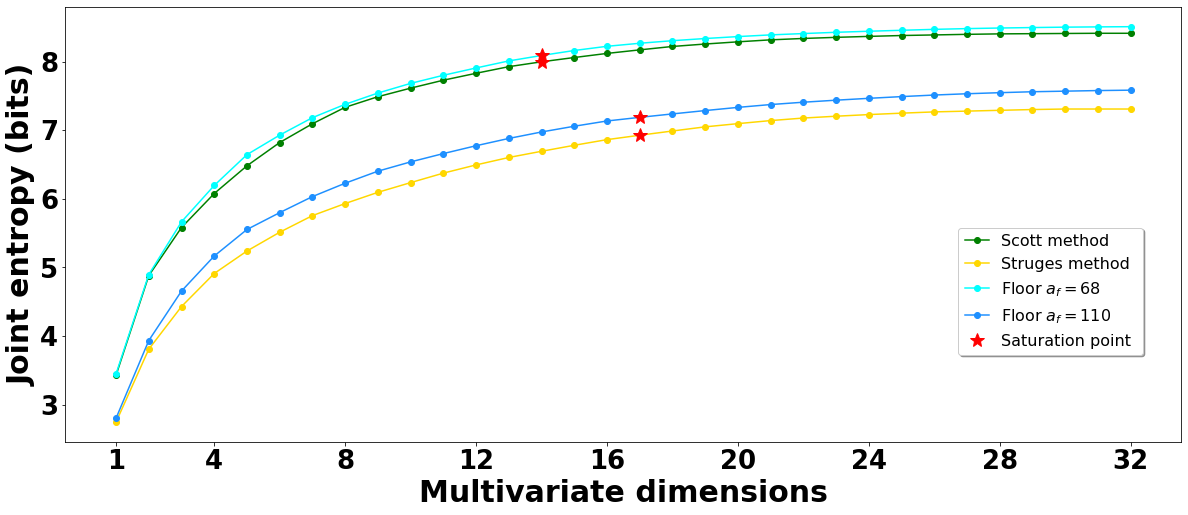

In [8]:
saturation_point=[]
for i in np.arange(4):
    ratio=(np.delete(Joint_entropy_evolution_maxJE_Ranking.iloc[i,:].values, 0)-np.delete(Joint_entropy_evolution_maxJE_Ranking.iloc[i,:].values, -1))/np.delete(Joint_entropy_evolution_maxJE_Ranking.iloc[i,:].values, -1)
    ratio=ratio[np.where(ratio<.01)] 
    saturation_point.append(32-len(ratio)+1) 


x=np.arange(1,33)
y1 = Joint_entropy_evolution_maxJE_Ranking.iloc[0]
y2 = Joint_entropy_evolution_maxJE_Ranking.iloc[1]
y3 = Joint_entropy_evolution_maxJE_Ranking.iloc[2]
y4 = Joint_entropy_evolution_maxJE_Ranking.iloc[3]

fig=plt.figure(figsize=(20, 8))
plt.plot(x,y1, 'o-',color='g')
plt.plot(x,y2, 'o-',color='gold')
plt.plot(x,y3, 'o-',color='cyan')
plt.plot(x,y4, 'o-',color='dodgerblue')
plt.plot(saturation_point[0],y1[saturation_point[0]-1],'*',color='r', markersize=15)
plt.plot(saturation_point[1],y2[saturation_point[1]-1],'*',color='r', markersize=15)
plt.plot(saturation_point[2],y3[saturation_point[2]-1],'*',color='r', markersize=15)
plt.plot(saturation_point[3],y4[saturation_point[3]-1],'*',color='r', markersize=15)
plt.xticks([1,4,8,12,16,20,24,28,32])
plt.xticks(fontsize=26,fontweight='bold')
plt.yticks(fontsize=26,fontweight='bold')
# legend
plt.legend(('Scott method','Struges method','Floor $a_f=68$','Floor $a_f=110$','Saturation point '),
           shadow=True, loc=(0.8, 0.2), handlelength=1.5, fontsize=16)
plt.xlabel('Multivariate dimensions', fontsize=30, fontweight='bold')
plt.ylabel('Joint entropy (bits)', fontsize=30, fontweight='bold')
plt.show()
fig.savefig("saturation_points.png",dpi=1000, bbox_inches="tight", pad_inches=.5,transparent=True)

# Figure7: The resulting AUI and joint entropy for all possible combinations between set of selected sensors and potential candidates

# Run Time=0:30:02.46


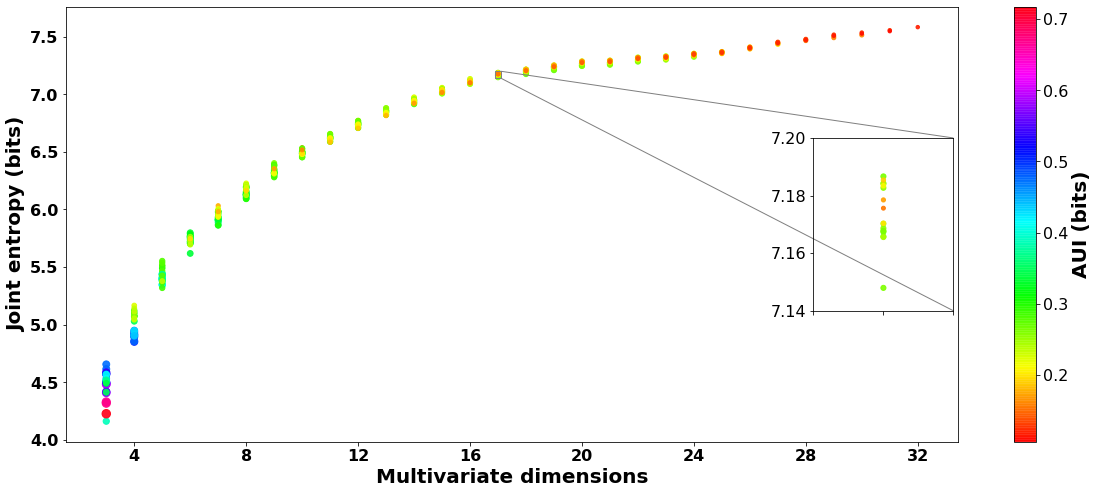

In [9]:
import copy
import itertools
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.cm import coolwarm
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from maxJEUI_function_list import information_decomposition
from maxJEUI_function_list import info_stats_merging_operator_multiple_varibles
from maxJEUI_function_list import hms_string

start_time = time.time()
data_quantized=floor_quantized_a_f_110
maxJEUI_order=maxJEUI_optimal_order_floor_a_f_110
dimension=np.arange(3,33)
joint_entropy=[]
AUI_potential_candidates=[]
reference_to_dimension=[] 
for d in dimension:
    selected_set=maxJEUI_order[0:d-1]
    list_difference = [item for item in maxJEUI_order if item not in selected_set]
    potential_candidates=list_difference
    unique_info_potential_candidates=np.zeros((len(potential_candidates), len(selected_set), len(selected_set)-1))
    i=0
    j=0
    k=0
    for s1 in potential_candidates:
        target_index=copy.deepcopy(selected_set)
        j=0
        for T in target_index:
            source_2nd=copy.deepcopy(selected_set)
            source_2nd.remove(T)
            k=0
            for s2 in source_2nd:
                unique_info_potential_candidates[i,j,k]=information_decomposition(data_quantized.iloc[:,s1-1],data_quantized.iloc[:,s2-1],data_quantized.iloc[:,T-1])[0]
                k+=1
            j+=1
        i+=1
    AUI_potential_candidates.append((unique_info_potential_candidates.mean(axis=2).mean(axis=1)))
    for s1 in potential_candidates:
        combination_order=[selected_set,[s1]]
        combination_order= list(itertools.chain.from_iterable(combination_order))
        joint_entropy.append(info_stats_merging_operator_multiple_varibles(floor_quantized_a_f_110,combination_order)[0])  
        reference_to_dimension.append(d)
#flatten the list means [[a,b],[c,d]] ==>> [a,b,c,d]
flatten_AUI_potential_candidates=[]
for i in AUI_potential_candidates:
    for j in i:
        flatten_AUI_potential_candidates.append(j)
AUI_potential_candidates=flatten_AUI_potential_candidates
time_took = time.time() - start_time
print(f"# Run Time={hms_string(time_took)}")

## figure7 ######################################################################################################
fig, ax = plt.subplots(figsize=(20, 8))
x = np.array(reference_to_dimension)
y = np.array(joint_entropy)
z = np.array(AUI_potential_candidates)
colors = z
sizes = z*100
s=ax.scatter(x, y, c=colors, s=sizes, alpha=0.9,cmap='hsv')
cbar = plt.colorbar(s,format="%.01f",spacing='proportional')
cbar.set_label('AUI (bits)', fontsize=20, fontweight='bold')
cbar.ax.tick_params(labelsize=16)
plt.xticks([4,8,12,16,20,24,28,32])
plt.xticks(fontsize=16,fontweight='bold')
plt.yticks(fontsize=16,fontweight='bold')
plt.xlabel('Multivariate dimensions', fontsize=20, fontweight='bold')
plt.ylabel('Joint entropy (bits)', fontsize=20, fontweight='bold')
axins = zoomed_inset_axes(ax, 25, loc=5) 
axins.scatter(x, y, c=colors, s=sizes, alpha=0.9,cmap='hsv')
axins.set_xlim(16.9, 17.1) # Limit the region for zoom
axins.set_ylim(7.14, 7.20)
axins.yaxis.set_tick_params(labelsize=16)
plt.xticks(visible=False)  # Not present ticks
plt.yticks(visible=True)
#
## draw a bbox of the region of the inset axes in the parent axes and
## connecting lines between the bbox and the inset axes area
mark_inset(ax, axins, loc1=1, loc2=4, fc="none", ec="0.5")
plt.draw()
plt.show()
fig.savefig("AUI_points.png",dpi=1000, bbox_inches="tight", pad_inches=.5,transparent=True)

# Table3: Optimal gauge orders found with different methods and corresponding marginal and joint entropies

In [10]:
from maxJEUI_function_list import info_stats_merging_operator_multiple_varibles
from maxJEUI_function_list import entropy_1D
from maxJEUI_function_list import hms_string
start_time = time.time()
header = pd.MultiIndex.from_product([['maxJEUI method','maxJE method'],['Station ID','Marginal entropy','Joint entropy']],
                                    names=['Objective function:','output:'])
Table3 = pd.DataFrame(np.zeros(6*32, dtype='f').reshape(32,6),index=['Ranked'+str(i) for i in (np.arange(32)+1)],columns=header)


maxJEUI_marg_H=[]
maxJEUI_joint_H=[]
maxJE_marg_H=[]
maxJE_joint_H=[]
for i in np.arange(32):
    maxJEUI_marg_H.append(entropy_1D(floor_quantized_a_f_110.iloc[:,maxJEUI_optimal_order_floor_a_f_110[i]-1]))
    maxJE_marg_H.append(entropy_1D(floor_quantized_a_f_110.iloc[:,maxJE_optimal_order_floor_a_f_110[i]-1]))
    maxJEUI_joint_H.append(info_stats_merging_operator_multiple_varibles(floor_quantized_a_f_110,maxJEUI_optimal_order_floor_a_f_110[0:i+1])[0])
    maxJE_joint_H.append(info_stats_merging_operator_multiple_varibles(floor_quantized_a_f_110,maxJE_optimal_order_floor_a_f_110[0:i+1])[0])

Table3['maxJEUI method','Station ID']=maxJEUI_optimal_order_floor_a_f_110
Table3['maxJE method','Station ID']=maxJE_optimal_order_floor_a_f_110
Table3['maxJEUI method','Marginal entropy']=maxJEUI_marg_H
Table3['maxJE method','Marginal entropy']=maxJE_marg_H
Table3['maxJEUI method','Joint entropy']=maxJEUI_joint_H
Table3['maxJE method','Joint entropy']=maxJE_joint_H
time_took = time.time() - start_time
print(f"# Run Time={hms_string(time_took)}")
display('=============== Table3: Optimal gauge orders found with different methods and corresponding marginal and joint entropies.===================')
display(Table3)

# Run Time=0:00:20.07


'=============== Table3: Optimal gauge orders found with different methods and corresponding marginal and joint entropies.==================='

Objective function: maxJEUI method                                 \
output:                 Station ID Marginal entropy Joint entropy   
Ranked1                          1         2.803447      2.803447   
Ranked2                         14         2.168787      3.934833   
Ranked3                         28         2.723569      4.655723   
Ranked4                          6         2.309316      5.166349   
Ranked5                         30         2.532802      5.553077   
Ranked6                         16         2.785958      5.798270   
Ranked7                         13         2.230779      6.032157   
Ranked8                          5         2.406387      6.226887   
Ranked9                         10         2.589107      6.402520   
Ranked10                        32         2.220390      6.537669   
Ranked11                        27         2.068419      6.658860   
Ranked12                        12         2.343602      6.773187   
Ranked13                        29         2.690718      6.879445   
Ranked14                         4         2.505615      6.973597   
Ranked15                        11         2.457686      7.057236   
Ranked16                         7         2.772473      7.133956   
Ranked17                        15         2.789918      7.165769   
Ranked18                        21         2.786260      7.202540   
Ranked19                        22         2.759045      7.238488   
Ranked20                         8         2.779885      7.246024   
Ranked21                         2         2.775909      7.273494   
Ranked22                         9         2.719832      7.283904   
Ranked23                        17         2.696023      7.309622   
Ranked24                        23         2.684080      7.325278   
Ranked25                         3         2.650135      7.365565   
Ranked26                        18         2.531985      7.410002   
Ranked27                        24         2.519841      7.435040   
Ranked28                        19         2.411815      7.472617   
Ranked29                        25         2.380815      7.490766   
Ranked30                        31         2.371119      7.514467   
Ranked31                        20         2.293198      7.555759   
Ranked32                        26         2.233864      7.582849   

Objective function: maxJE method                                 
output:               Station ID Marginal entropy Joint entropy  
Ranked1                        1         2.803447      2.803447  
Ranked2                       14         2.168787      3.934833  
Ranked3                       28         2.723569      4.655723  
Ranked4                        6         2.309316      5.166349  
Ranked5                       30         2.532802      5.553077  
Ranked6                       16         2.785958      5.798270  
Ranked7                       13         2.230779      6.032157  
Ranked8                        5         2.406387      6.226887  
Ranked9                       10         2.589107      6.402520  
Ranked10                      32         2.220390      6.537669  
Ranked11                      27         2.068419      6.658860  
Ranked12                      12         2.343602      6.773187  
Ranked13                      29         2.690718      6.879445  
Ranked14                       4         2.505615      6.973597  
Ranked15                      11         2.457686      7.057236  
Ranked16                       7         2.772473      7.133956  
Ranked17                      22         2.759045      7.186644  
Ranked18                      18         2.531985      7.236829  
Ranked19                       3         2.650135      7.285560  
Ranked20                      31         2.371119      7.331946  
Ranked21                      20         2.293198      7.373238  
Ranked22                      19         2.411815      7.407363  
Ranked23                      21         2.786260      7.436922  
Ran

# Generate input (.csv to produce figure6 in R language)

In [11]:
from maxJEUI_function_list import information_decomposition
from maxJEUI_function_list import hms_string
import time
start_time = time.time()
data_quantized=floor_quantized_a_f_110
source_1st=list(np.arange(32)+1)
unique_info_all_combination=np.zeros((32, 32, 32))
for s1 in source_1st:
    target_index=list(np.arange(32)+1)
    target_index.remove(s1)
    for T in target_index:
        source_2nd=list(np.arange(32)+1)
        source_2nd.remove(s1)
        source_2nd.remove(T)
        for s2 in source_2nd:
            unique_info_all_combination[s1-1,T-1,s2-1]=information_decomposition(data_quantized.iloc[:,s1-1],data_quantized.iloc[:,s2-1],data_quantized.iloc[:,T-1])[0]
UI_S_inrow_T_incolumn=unique_info_all_combination.mean(axis=2)

Input_to_produce_figure6=pd.DataFrame(UI_S_inrow_T_incolumn,index=['Station_ID'+str(i) for i in (np.arange(32)+1)],
                    columns=['Station_ID'+str(i) for i in (np.arange(32)+1)])
Input_to_produce_figure6.to_csv('Input_to_produce_figure6.csv',index=False)
time_took = time.time() - start_time
print(f"# Run Time={hms_string(time_took)}")
display('======== All possible UI interactions in the network: Columns indicate the amount of unique information a station receives as a target variable from another one(shown is rows) when the rest of the stations serve as a secondary source on average. ===================')
display(Input_to_produce_figure6)

# Run Time=0:10:18.84


'======== All possible UI interactions in the network: Columns indicate the amount of unique information a station receives as a target variable from another one(shown is rows) when the rest of the stations serve as a secondary source on average. ==================='

,Station_ID1,Station_ID2,Station_ID3,Station_ID4,Station_ID5,Station_ID6,Station_ID7,Station_ID8,Station_ID9,Station_ID10,...,Station_ID23,Station_ID24,Station_ID25,Station_ID26,Station_ID27,Station_ID28,Station_ID29,Station_ID30,Station_ID31,Station_ID32
Station_ID1,0.000000,0.698194,0.276380,0.101716,0.056132,0.030325,0.560497,0.563655,0.348240,0.173848,...,0.178112,0.091703,0.053611,0.028322,0.025180,0.167279,0.157134,0.086157,0.052460,0.029880
Station_ID2,0.752596,0.000000,0.314474,0.115606,0.059712,0.028203,0.630926,0.674720,0.401887,0.203437,...,0.202370,0.104388,0.057268,0.026833,0.021572,0.195177,0.183543,0.098435,0.059351,0.029220
Station_ID3,0.358307,0.377204,0.000000,0.248098,0.095099,0.050292,0.349031,0.344041,0.386932,0.421283,...,0.385529,0.192162,0.092789,0.044032,0.028975,0.328438,0.374656,0.182487,0.083211,0.043383
Station_ID4,0.149795,0.162885,0.233606,0.000000,0.213765,0.124885,0.154214,0.153516,0.177775,0.287988,...,0.183955,0.397479,0.151486,0.106236,0.055196,0.161053,0.184596,0.363247,0.131149,0.108507
Station_ID5,0.080756,0.086810,0.103453,0.176127,0.000000,0.233105,0.080953,0.086223,0.095526,0.115492,...,0.089605,0.183075,0.400723,0.123704,0.077844,0.096968,0.093192,0.178066,0.355268,0.101361
Station_ID6,0.036353,0.035855,0.048562,0.082375,0.175286,0.000000,0.033176,0.036122,0.043856,0.062832,...,0.048581,0.083115,0.215569,0.306026,0.118595,0.051714,0.051437,0.081778,0.210333,0.268832
Station_ID7,0.624571,0.650030,0.296467,0.111453,0.056242,0.026402,0.000000,0.714720,0.433534,0.203875,...,0.227436,0.114719,0.057066,0.029941,0.025266,0.228215,0.195709,0.107865,0.059216,0.034532
Station_ID8,0.631275,0.698784,0.293334,0.112208,0.061073,0.028911,0.719406,0.000000,0.500003,0.204412,...,0.234894,0.106709,0.063658,0.027855,0.024083,0.213528,0.195525,0.101596,0.063652,0.032523
Station_ID9,0.432267,0.460138,0.386248,0.158795,0.081859,0.042713,0.476206,0.534531,0.000000,0.270143,...,0.340931,0.137402,0.084667,0.040087,0.028906,0.359906,0.300815,0.136646,0.078060,0.044306
Station_ID10,0.236213,0.258990,0.404111,0.311520,0.128536,0.078415,0.252815,0.251397,0.280072,0.000000,...,0.325886,0.275251,0.117788,0.059211,0.033577,0.233013,0.295008,0.283425,0.111474,0.055725


# Generate input (.csv to produce figure8 in R language)

In [12]:
import copy
from maxJEUI_function_list import information_decomposition
data=floor_quantized_a_f_110
maxJEUI_optimal_order=[1, 14, 28, 6, 30, 16, 13, 5, 10, 32, 27, 12, 29, 4, 11, 7, 15, 21, 22, 8, 2, 9, 17, 23, 3, 18, 24, 19, 25, 31, 20, 26]
saturation_point=17
selected_set=maxJEUI_optimal_order[0:saturation_point-1]
potential_candidates=maxJEUI_optimal_order[saturation_point-1:]
unique_info_potential_candidate_selected=np.zeros(len(selected_set)-1)
UI_source_target_setup_info=[]
for s1 in potential_candidates:
    target_index=copy.deepcopy(selected_set)
    for T in target_index:
        source_2nd=copy.deepcopy(selected_set)
        source_2nd.remove(T)
        k=0
        for s2 in source_2nd:
            unique_info_potential_candidate_selected[k]=information_decomposition(data.iloc[:,s1-1],data.iloc[:,s2-1],data.iloc[:,T-1])[0]
            k+=1
        AUI_over_2nd_selected_source=unique_info_potential_candidate_selected.mean()
        UI_source_target_setup_info.append([s1,T,AUI_over_2nd_selected_source])

Input_to_produce_figure8=pd.DataFrame(UI_source_target_setup_info,columns=['Potential_candidates','Target_variable','AUI_value'])
Input_to_produce_figure8['Potential_candidates']=['S'+str(i) for i in Input_to_produce_figure8['Potential_candidates']]
Input_to_produce_figure8['Target_variable']=['S'+str(i) for i in Input_to_produce_figure8['Target_variable']]

Input_to_produce_figure8.to_csv('Input_to_produce_figure8.csv',index=False)
print(""" =======Strengths (bits) of UI interactions between set of potential candidates and set of 
        already selected sensors once the network reaches its saturation point===========""")
display(Input_to_produce_figure8)

 =======Strengths (bits) of UI interactions between set of potential candidates and set of 
        already selected sensors once the network reaches its saturation point===========


,Potential_candidates,Target_variable,AUI_value
0,S15,S1,0.615760
1,S15,S14,0.028378
2,S15,S28,0.454559
3,S15,S6,0.041685
4,S15,S30,0.194265
...,...,...,...
251,S26,S12,0.171759
252,S26,S29,0.084898
253,S26,S4,0.094160
254,S26,S11,0.108074
